# Stock Recommendation System

##  Exploratory Data Analysis

In [1]:
#import database

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\Administrator\Desktop\DATA\Python Test Data\stock_recomm.csv')

In [2]:
#renaming

data.rename(columns={'Unnamed: 0': 'Symbol'}, inplace=True)

In [3]:
data.head()

,Symbol,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI
0,MMM,9.16,19.54,19.14,8.94,1.91,8.82,3.41,49.2,16.4
1,ABT,6.18,61.69,26.19,4.14,0.64,1.73,1.35,10.1,8.2
2,ABBV,10.04,19.72,7.40,2.38,5.94,4.55,5.27,-303.4,21.2
3,ABMD,11.28,79.37,52.20,3.31,0.00,3.48,NaN,15.1,17.9
4,ACN,9.41,30.85,29.21,4.04,0.00,7.68,1.35,32.4,33.9


In [4]:
#importing libraries

import matplotlib.pyplot as plt
import seaborn as sns

### Descriptive Summary

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
Symbol         505 non-null object
P/B            476 non-null float64
P/E            434 non-null float64
Forward P/E    485 non-null float64
PEG            362 non-null float64
Debt/Eq        470 non-null float64
EPS (ttm)      503 non-null float64
Dividend %     385 non-null float64
ROE            489 non-null float64
ROI            496 non-null float64
dtypes: float64(9), object(1)
memory usage: 39.5+ KB


In [6]:
data.describe()

,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI
count,476.000000,434.000000,485.000000,362.000000,470.000000,503.000000,385.000000,489.00000,496.000000
mean,9.555441,45.846751,27.298351,10.952376,1.655723,4.370517,2.687610,7.94274,13.215121
std,41.372343,107.032100,63.304397,41.157565,3.203592,12.254987,1.860071,88.62421,18.891039
min,0.310000,1.800000,3.440000,0.330000,0.000000,-49.310000,0.020000,-862.90000,-58.800000
25%,1.635000,17.590000,12.820000,2.582500,0.412500,1.195000,1.320000,4.90000,5.900000
50%,3.345000,26.070000,19.290000,3.760000,0.800000,3.220000,2.270000,11.60000,10.200000
75%,6.947500,39.945000,27.320000,6.112500,1.607500,5.665000,3.590000,24.10000,17.050000
max,732.160000,1617.500000,1053.330000,495.690000,30.230000,208.090000,13.340000,496.90000,305.700000


### Missing values

In [7]:
print(data.isnull().sum())

Symbol           0
P/B             29
P/E             71
Forward P/E     20
PEG            143
Debt/Eq         35
EPS (ttm)        2
Dividend %     120
ROE             16
ROI              9
dtype: int64


In [8]:
data.shape

(505, 10)

### Distribution

<Figure size 1008x432 with 0 Axes>

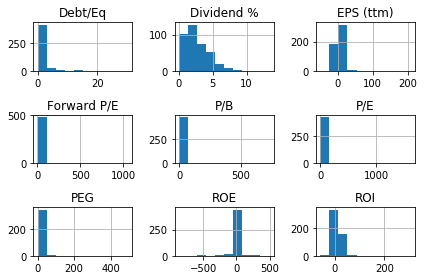

In [9]:
plt.figure(figsize=[14,6])
data.hist()
plt.tight_layout()

### Outlier Detection

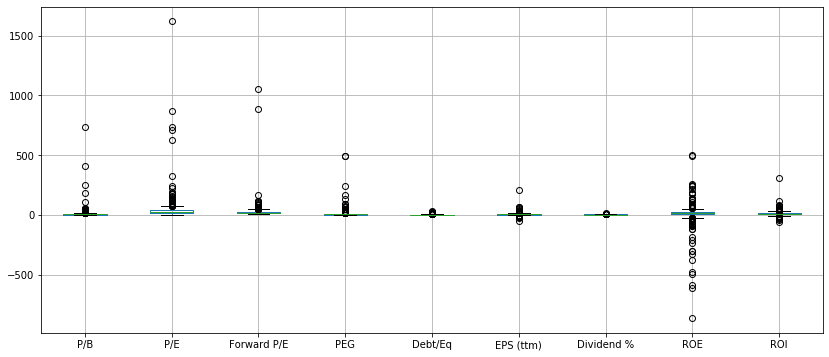

In [10]:
plt.figure(figsize=[14,6])
data.boxplot()

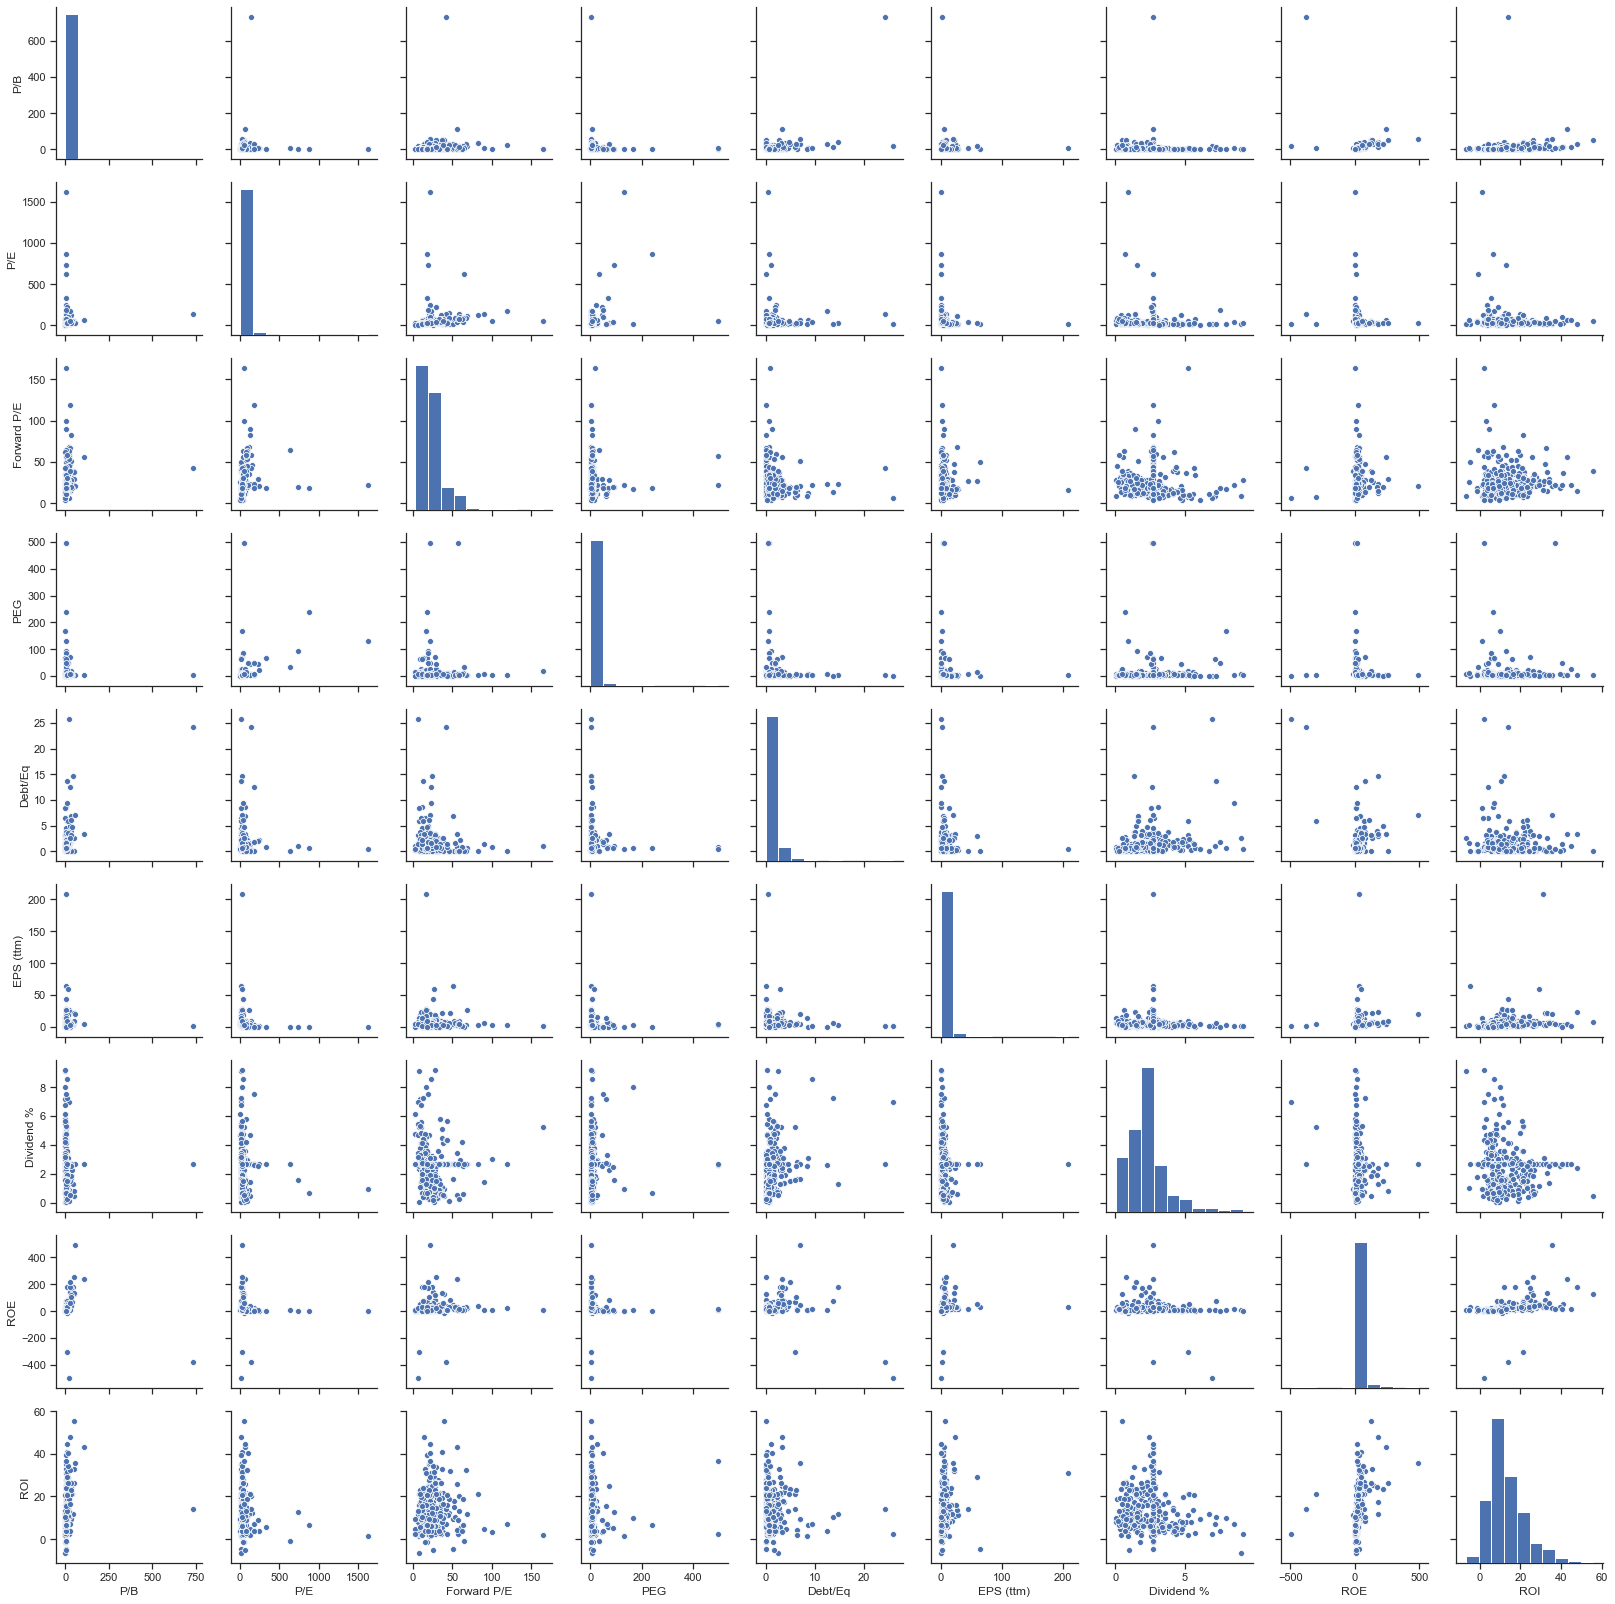

In [57]:
import seaborn as sns
sns.set(style='ticks' , color_codes=True)
sns.pairplot(data)
plt.show()

#### It is observed that much of the variables are skewed and have outliers. Also the dividend column has missing values

#### Since much of the data for Dividend % column seems to be centred around the mean, the missing values can be imputed
#### with the mean of the Dividend% column

In [11]:
#Replacing
data['Dividend %'].fillna(data['Dividend %'].mean(), inplace=True)

#### For PEG, ROE column since data is not much centred around the mean, it cannot be imputed with mean values

In [12]:
data.dropna(axis=0, inplace=True)

In [13]:
# checking missing values again

data.isnull().sum()

Symbol         0
P/B            0
P/E            0
Forward P/E    0
PEG            0
Debt/Eq        0
EPS (ttm)      0
Dividend %     0
ROE            0
ROI            0
dtype: int64

In [14]:
data.head()

,Symbol,P/B,P/E,Forward P/E,PEG,Debt/Eq,EPS (ttm),Dividend %,ROE,ROI
0,MMM,9.16,19.54,19.14,8.94,1.91,8.82,3.41000,49.2,16.4
1,ABT,6.18,61.69,26.19,4.14,0.64,1.73,1.35000,10.1,8.2
2,ABBV,10.04,19.72,7.40,2.38,5.94,4.55,5.27000,-303.4,21.2
3,ABMD,11.28,79.37,52.20,3.31,0.00,3.48,2.68761,15.1,17.9
4,ACN,9.41,30.85,29.21,4.04,0.00,7.68,1.35000,32.4,33.9


In [15]:
print(data.shape)
print('\n')
print(data.columns)

(332, 10)


Index(['Symbol', 'P/B', 'P/E', 'Forward P/E', 'PEG', 'Debt/Eq', 'EPS (ttm)',
       'Dividend %', 'ROE', 'ROI'],
      dtype='object')


## Preprocessing data

In [16]:
# Features and variables

var = data[['P/B', 'P/E', 'Forward P/E', 'PEG', 'Debt/Eq', 'EPS (ttm)',
        'ROE', 'ROI']].values

target = data['Dividend %'].values

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

var = scaler.fit_transform(var)

### Splitting data

In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(var , target , test_size=0.4)

## Modelling 

#### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
linreg_pred = linreg.predict(X_test)

#metrics

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

linreg_mse = mse(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

print(f'RMSE for LinReg is {linreg_mse**0.5}')
print('\n')
print(f'R2 score for LinReg is {linreg_r2}')

RMSE for LinReg is 2.2071611961423123


R2 score for LinReg is -0.8125033240381649


#### Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree  = DecisionTreeRegressor()
criterion = ['mae', 'friedman_mse', 'mse']

tree_grid = {'criterion': criterion,
            'max_depth': range(2,20,2)}

tree_reg = GridSearchCV(tree, tree_grid, cv=5, n_jobs=-1, verbose=True)

tree_reg.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    3.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mae', 'friedman_mse', 'mse'],
                         'max_depth': range(2, 20, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

In [34]:
tree_pred = tree_reg.predict(X_test)

In [40]:
tree_reg_mse = mse(y_test , tree_pred)

tree_reg_r2 = r2_score(y_test , tree_pred)

print(f'MSE for Decision Tree Regressor : {tree_reg_mse**0.5}')
print('\n')
print(f'R2 score for Decision Tree Regression : {tree_reg_r2}')

MSE for Decision Tree Regressor : 1.7214246505048316


R2 score for Decision Tree Regression : -0.10252067572283141


#### Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

rf_grid = {'n_estimators':[50,100,200,500] , 'criterion':['mae','mse']}

rf_reg = GridSearchCV(random_forest , rf_grid, cv=5, n_jobs=-1)

rf_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mae', 'mse'],
    

In [69]:
rf_pred = rf_reg.predict(X_test)

rf_mse = mse(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'RSME for Random Forest : {rf_mse**0.5}')
print('\n')
print(f'R2 score for Random Forest: {rf_r2}')

RSME for Random Forest : 1.5189715608080905


R2 score for Random Forest: 0.14155990728221146


### Support Vector Machine

In [59]:
from sklearn.svm import SVR

svr = SVR()

kernel = ['linear', 'poly']
degree = [2,3]
svr_grid = {'kernel': kernel, 'degree': degree}

svr_reg = GridSearchCV(svr, svr_grid, cv=5, n_jobs=-1, verbose=True)

svr_reg.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'degree': [2, 3], 'kernel': ['linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [61]:
svr_pred = svr_reg.predict(X_test)

svr_mse = mse(y_test , svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print(f'RMSE for SVR : {svr_mse ** 0.5}')
print('\n')
print(f'R2 score for SVR : {svr_r2}')

RMSE for SVR : 1.709896086011836


R2 score for SVR : -0.08780272801749578


#### KNN

In [72]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn_grid = {'p':[2,5,7] , 'n_neighbors':[3,5,10,15]}

knn_reg = GridSearchCV(knn , knn_grid, cv=5, n_jobs=-1, verbose=True)

knn_reg.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 10, 15], 'p': [2, 5, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [73]:
knn_reg_pred = knn_reg.predict(X_test)

knn_mse = mse(y_test, knn_reg_pred)
knn_r2_score = r2_score(y_test, knn_reg_pred)

print(f'RSME for KNN : {knn_mse ** 0.5}')
print('\n')
print(f'R2 score for KNN : {knn_r2_score}')

RSME for KNN : 1.5768640416446789


R2 score for KNN : 0.07487757855787125


# Results summary

In [74]:
col1 = [2.2071,  1.7214, 1.5189, 1.7098, 1.5768]

col2 = [-0.8125, -0.1025,  0.1415, -0.0878, 0.0748]

summary = pd.DataFrame(list(zip(col1, col2)), columns=['RMSE', 'R2_score'],
                     index=['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor',
                           'Support Vector Machine', 'KNN Regressor'])


In [75]:
summary

,RMSE,R2_score
Linear Regression,2.2071,-0.8125
Decision Tree Regressor,1.7214,-0.1025
Random Forest Regressor,1.5189,0.1415
Support Vector Machine,1.7098,-0.0878
KNN Regressor,1.5768,0.0748
